# Text classification with bag of words

## Download and Explore the Data

Outline:

1. Download the dataset
2. Explore the data using Pandas
3. Create a small working sample

### Download the Data to Colab

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv('/content/train.csv')

### Explore the Data using Pandas

In [ ]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0
...,...,...,...
805315,9dc8b2b22b32b2d29234,What is a possible explanation to the Teddy Ja...,0.0
805316,9dc8d2b615370ec44381,Is it narcissistic to think that you have too ...,0.0
805317,9dc8d66aec3d02aa81cc,What are the main differences between being an...,0.0
805318,9dc8ebbd00102dd1a822,Can I pay the BSNL outstanding landline bill a...,0.0


In [ ]:
sincere_df = raw_df[raw_df.target == 0]

In [ ]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [ ]:
insincere_df = raw_df[raw_df.target == 1]

In [ ]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [ ]:
raw_df.target.value_counts(normalize=True)

0.0    0.938288
1.0    0.061712
Name: target, dtype: float64

<Axes: >

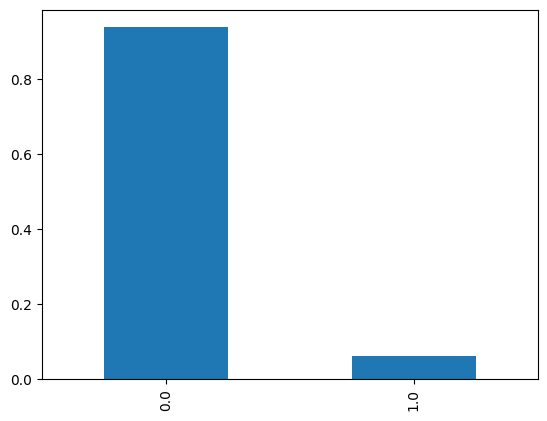

In [ ]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [ ]:
texts = raw_df.question_text
total_length = 0
text_count = 0

for text in texts:
    total_length += len(text)
    text_count += 1

average_length = total_length / text_count

print("Average text length:", average_length)

Average text length: 70.63406596135698


In [ ]:
!pip install wordcloud

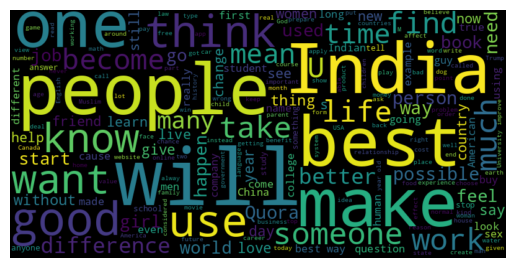

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(raw_df.question_text)

wordcloud = WordCloud(width=800, height=400).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
test_df = pd.read_csv('/content/test.csv')

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
sub_df = pd.read_csv('/content/sample_submission.csv')

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.prediction.value_counts()

0    375806
Name: prediction, dtype: int64

### Create a Working Sample

In [ ]:
SAMPLE_SIZE = 100_000

In [ ]:
sample_df = raw_df.sample(SAMPLE_SIZE, random_state=42)

In [ ]:
sample_df

,qid,question_text,target
580673,71c5f4b8c076933330e2,Should I buy Beginning of the End book from ia...,0.0
223475,2bb48f84fb1e54cf7597,What are some good law related online courses ...,0.0
366983,47ee8b6d8e3badec039a,"What does TLS actually encrypt, is it the chan...",0.0
414702,5141e1d744cd9b916b64,"Question for the Gemini man, do you like recei...",0.0
759770,94dc7f346342f38672ad,What is the background of the three trees (sil...,0.0
...,...,...,...
804709,9dace5b650ae1d47c2b9,Why is Donny Trump such a doofus?,1.0
356693,45ea87bb1d580984b418,How did you know my password?,0.0
383379,4b2214b0efab15fc69c0,What was the most awkward moment during first ...,0.0
259168,32b94a15edb72edc005d,Are there good rules of thumb for which vegeta...,0.0


## Text Preprocessing Techniques

Outline:
1. Understand the bag of words model
2. Tokenization
3. Stop word removal
4. Stemming

### Bag of words Intuition

1. Create a list of all the words across all the text documents
2. You convert each document into vector counts of each word

Limitations:
1. There may be too many words in the dataset.
2. Some words may occur too frequently.
3. Some words may occus very rarely or only once.
4. A single word may have many forms (go, gone, goind or bird vs. birds).

In [ ]:
q0 = sincere_df.question_text.values[1]

In [ ]:
q1 = raw_df[raw_df.target == 1].question_text.values[0]

### Tokenization

Splitting a document into words and seperators

In [ ]:
import nltk

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [ ]:
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [ ]:
word_tokenize(q1)

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [ ]:
q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

### Stop Word Removal

Removing commonly occuring words

In [ ]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
','.join(english_stopwords)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [ ]:
def remove_stopwords(tokens):
  return [word for word in tokens if word.lower() not in english_stopwords]

In [ ]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [ ]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [ ]:
q0_stp = remove_stopwords(q0_tok)

In [ ]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [ ]:
q1_stp = remove_stopwords(q1_tok)

In [ ]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

### Stemming

'go', 'gone', 'going' -> 'go'
'birds', 'bird' -> 'bird'

In [ ]:
import nltk.stem

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer(language ='english')

In [ ]:
stemmer.stem('going')

'go'

In [ ]:
q0_stm = [stemmer.stem(word) for word in q0_stp]

In [ ]:
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [ ]:
q1_stm = [stemmer.stem(word) for word in q1_stp]

In [ ]:
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

### Lemmatization

"love" -> "love"
"loving" -> "love"
"lovable" -> "love"

## Implement Bag of Words

Otline:
1. Create a vocabulary using Count Vectorizer
2. Transform text to vectors using Count Vectorizer
3. Configure text preprocessing in Count Vectorizer

### Create a vocabulary

In [ ]:
small_df = sample_df[:5]

In [ ]:
small_df

,qid,question_text,target
580673,71c5f4b8c076933330e2,Should I buy Beginning of the End book from ia...,0.0
223475,2bb48f84fb1e54cf7597,What are some good law related online courses ...,0.0
366983,47ee8b6d8e3badec039a,"What does TLS actually encrypt, is it the chan...",0.0
414702,5141e1d744cd9b916b64,"Question for the Gemini man, do you like recei...",0.0
759770,94dc7f346342f38672ad,What is the background of the three trees (sil...,0.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
small_vect = CountVectorizer()

In [ ]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [ ]:
small_vect.vocabulary_

{'should': 43,
 'buy': 8,
 'beginning': 6,
 'of': 35,
 'the': 49,
 'end': 20,
 'book': 7,
 'from': 23,
 'iamgauresh': 26,
 'com': 11,
 'or': 37,
 'amazon': 1,
 'what': 56,
 'are': 3,
 'some': 46,
 'good': 25,
 'law': 30,
 'related': 41,
 'online': 36,
 'courses': 13,
 'which': 57,
 'provide': 38,
 'certificate': 9,
 'course': 12,
 'that': 48,
 'is': 28,
 'valued': 55,
 'in': 27,
 'cv': 14,
 'does': 18,
 'tls': 52,
 'actually': 0,
 'encrypt': 19,
 'it': 29,
 'channel': 10,
 'data': 15,
 'flowing': 21,
 'through': 51,
 'question': 39,
 'for': 22,
 'gemini': 24,
 'man': 34,
 'do': 17,
 'you': 58,
 'like': 32,
 'receiving': 40,
 'love': 33,
 'letters': 31,
 'background': 5,
 'three': 50,
 'trees': 53,
 'silent': 44,
 'talking': 47,
 'and': 2,
 'singing': 45,
 'at': 4,
 'uc': 54,
 'san': 42,
 'diego': 16}

In [ ]:
small_vect.get_feature_names_out()

array(['actually', 'amazon', 'and', 'are', 'at', 'background',
       'beginning', 'book', 'buy', 'certificate', 'channel', 'com',
       'course', 'courses', 'cv', 'data', 'diego', 'do', 'does',
       'encrypt', 'end', 'flowing', 'for', 'from', 'gemini', 'good',
       'iamgauresh', 'in', 'is', 'it', 'law', 'letters', 'like', 'love',
       'man', 'of', 'online', 'or', 'provide', 'question', 'receiving',
       'related', 'san', 'should', 'silent', 'singing', 'some', 'talking',
       'that', 'the', 'three', 'through', 'tls', 'trees', 'uc', 'valued',
       'what', 'which', 'you'], dtype=object)

### Transform documents into Vectors

In [ ]:
vectors = small_vect.transform(small_df.question_text)

In [ ]:
vectors.shape

(5, 59)

In [ ]:
vectors

<5x59 sparse matrix of type '<class 'numpy.int64'>'
	with 69 stored elements in Compressed Sparse Row format>

In [ ]:
vectors[0].toarray()

array([[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
vectors.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 

### Configure Count Vectorizer Parameters

In [ ]:
stemmer = SnowballStemmer(language = 'english')

In [ ]:
def tokenize(text):
  return [stemmer.stem(word) for word in word_tokenize(text)]

In [ ]:
tokenize('What is the really (deal) here?')

['what', 'is', 'the', 'realli', '(', 'deal', ')', 'here', '?']

In [ ]:
vectorizer = CountVectorizer(lowercase = True,
                             tokenizer = tokenize,
                             stop_words = english_stopwords,
                             max_features = 1000)

In [ ]:
sample_df

,qid,question_text,target
580673,71c5f4b8c076933330e2,Should I buy Beginning of the End book from ia...,0.0
223475,2bb48f84fb1e54cf7597,What are some good law related online courses ...,0.0
366983,47ee8b6d8e3badec039a,"What does TLS actually encrypt, is it the chan...",0.0
414702,5141e1d744cd9b916b64,"Question for the Gemini man, do you like recei...",0.0
759770,94dc7f346342f38672ad,What is the background of the three trees (sil...,0.0
...,...,...,...
804709,9dace5b650ae1d47c2b9,Why is Donny Trump such a doofus?,1.0
356693,45ea87bb1d580984b418,How did you know my password?,0.0
383379,4b2214b0efab15fc69c0,What was the most awkward moment during first ...,0.0
259168,32b94a15edb72edc005d,Are there good rules of thumb for which vegeta...,0.0


In [ ]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: user 35.6 s, sys: 90.2 ms, total: 35.7 s
Wall time: 36.2 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fed5ea9d2d0>)

In [ ]:
len(vectorizer.vocabulary_)

1000

In [ ]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', '+', ',', '-',
       '.', '1', '10', '100', '12', '12th', '15', '2', '20', '2017',
       '2018', '3', '30', '4', '5', '6', '7', '8', ':', '?', '[', ']',
       '``', 'abl', 'abus', 'accept', 'accomplish', 'accord', 'account',
       'achiev', 'acid', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'ago', 'agre',
       'air', 'allow', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'among', 'amount', 'analysi',
       'android', 'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon',
       'anyth', 'apart', 'app', 'appear', 'appl', 'appli', 'applic',
       'approach', 'arab', 'area', 'arm', 'armi', 'around', 'art',
       'asian', 'ask', 'atheist'], dtype=object)

In [ ]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 35.5 s, sys: 61 ms, total: 35.6 s
Wall time: 36.1 s


In [ ]:
inputs.shape

(100000, 1000)

In [ ]:
inputs

<100000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 548219 stored elements in Compressed Sparse Row format>

In [ ]:
inputs[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
sample_df.question_text.values[0]

'Should I buy Beginning of the End book from iamgauresh.com or from Amazon?'

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 2min 11s, sys: 299 ms, total: 2min 11s
Wall time: 2min 16s


## ML Models for Text Classification

Outline:
- Create a training and validation set
- Train models
- Make predictions on training, validation and test data

### Split into Training and Validation Set

In [ ]:
sample_df

,qid,question_text,target
580673,71c5f4b8c076933330e2,Should I buy Beginning of the End book from ia...,0.0
223475,2bb48f84fb1e54cf7597,What are some good law related online courses ...,0.0
366983,47ee8b6d8e3badec039a,"What does TLS actually encrypt, is it the chan...",0.0
414702,5141e1d744cd9b916b64,"Question for the Gemini man, do you like recei...",0.0
759770,94dc7f346342f38672ad,What is the background of the three trees (sil...,0.0
...,...,...,...
804709,9dace5b650ae1d47c2b9,Why is Donny Trump such a doofus?,1.0
356693,45ea87bb1d580984b418,How did you know my password?,0.0
383379,4b2214b0efab15fc69c0,What was the most awkward moment during first ...,0.0
259168,32b94a15edb72edc005d,Are there good rules of thumb for which vegeta...,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target,
                                                                        test_size=0.3, random_state = 42)

In [ ]:
train_inputs.shape

(70000, 1000)

In [ ]:
val_inputs.shape

(30000, 1000)

### Train a Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
MAX_ITER = 1000

In [ ]:
model = LogisticRegression(max_iter = MAX_ITER, solver = 'sag')

In [ ]:
%%time
model.fit(train_inputs, train_targets)

CPU times: user 24.3 s, sys: 22.9 ms, total: 24.3 s
Wall time: 25.4 s


LogisticRegression(max_iter=1000, solver='sag')

### Making predictions using the model

In [ ]:
train_pred = model.predict(train_inputs)

In [ ]:
pd.Series(train_pred).value_counts()

0.0    67958
1.0     2042
dtype: int64

In [ ]:
pd.Series(train_targets).value_counts()

0.0    65672
1.0     4328
Name: target, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_pred)

0.9498

In [ ]:
import numpy as np

In [ ]:
accuracy_score(train_targets, np.zeros(len(train_targets)))

0.9381714285714285

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(train_targets, train_pred)

0.44835164835164837

Fixed prediction

In [ ]:
f1_score(train_targets, np.zeros(len(train_targets)))

0.0

Random prediction

In [ ]:
f1_score(train_targets, np.random.choice((0,1), (len(train_targets))))

0.10870615764173258

In [ ]:
val_preds = model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, val_preds)

0.9471666666666667

In [ ]:
f1_score(val_targets, val_preds)

0.4144809752493535

In [ ]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [ ]:
sincere_df.target.values[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
model.predict(vectorizer.transform(sincere_df.question_text[:10]))

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [ ]:
insincere_df.target.values[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
model.predict(vectorizer.transform(insincere_df.question_text.values[:10]))

array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0.])

## Make Predictions and Submit it to Kaggle

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
test_inputs

<375806x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 2056242 stored elements in Compressed Sparse Row format>

In [ ]:
test_inputs.shape

(375806, 1000)

In [ ]:
test_preds = model.predict(test_inputs)

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.prediction = test_preds

In [ ]:
sub_df.prediction.value_counts()

0.0    364734
1.0     11072
Name: prediction, dtype: int64

In [ ]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

qid,prediction
0000163e3ea7c7a74cd7,0.0
00002bd4fb5d505b9161,0.0
00007756b4a147d2b0b3,0.0
000086e4b7e1c7146103,0.0
0000c4c3fbe8785a3090,0.0
000101884c19f3515c1a,0.0
00010f62537781f44a47,0.0
00012afbd27452239059,0.0
00014894849d00ba98a9,0.0
